# Comparing model predictions

The purpose of this notebook is to see how the models are differing in their predictions.

In [291]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [292]:
df = pd.read_csv('../data/Final Data/start_to_finish_with_preds.csv')

In [293]:
df.head()

,team_ops_pct_diff,obp_diff,team_obp_pct_diff,home_Rank_offset1year,away_WHIP_offset1year,team_ERA_pct_diff,home_win_diff_bayes,home_RD,team_bayes_pct_diff,away_win_diff_bayes,...,home_team,away_team,xgb_pred,knn_pred,knn_no_batting_pred,nn_pred,xgb_proba,knn_proba,knn_no_batting_proba,nn_proba
0,0.001479,0.001196,0.003769,2.0,1.253927,0.089783,-0.010464,101.0,0.0,-0.010464,...,PIT,SLN,0.0,0.0,1.0,0,0.452681,0.500000,0.520000,0.455505
1,-0.100639,-0.023374,-0.075552,4.0,1.214434,-0.018717,-0.010464,2.0,0.0,-0.010464,...,TBA,TOR,0.0,0.0,1.0,0,0.377228,0.473333,0.506667,0.395637
2,0.028053,0.009820,0.030927,1.0,1.179045,0.077540,-0.010464,83.0,0.0,-0.010464,...,KCA,NYN,1.0,1.0,1.0,1,0.629717,0.533333,0.546667,0.508145
3,0.031095,0.006132,0.019876,5.0,1.320066,0.043269,-0.010464,-35.0,0.0,-0.010464,...,OAK,CHA,1.0,0.0,1.0,1,0.572504,0.486667,0.506667,0.525333
4,-0.026164,-0.014945,-0.049505,3.0,1.151872,0.147208,-0.010464,-14.0,0.0,-0.010464,...,ANA,CHN,1.0,0.0,0.0,0,0.515874,0.486667,0.486667,0.497620


## Column distribution by model

In [294]:
df['xgb_correct'] = df['home_win'] == df['xgb_pred']
df['knn_correct'] = df['home_win'] == df['knn_pred']
df['knn_no_batting_correct'] = df['home_win'] == df['knn_no_batting_pred']
df['nn_correct'] = df['home_win'] == df['nn_pred']

In [295]:
def adjust_proba(x):
    if x > 0.5:
        return 2*(x - 0.5)
    else:
        return 2*(1 - x - 0.5)

In [296]:
df['xgb_proba_majority'] = df['xgb_proba'].apply(adjust_proba)
df['knn_proba_majority'] = df['knn_proba'].apply(adjust_proba)
df['knn_no_batting_proba_majority'] = df['knn_no_batting_proba'].apply(adjust_proba)
df['nn_proba_majority'] = df['nn_proba'].apply(adjust_proba)

In [297]:
df.head()

,team_ops_pct_diff,obp_diff,team_obp_pct_diff,home_Rank_offset1year,away_WHIP_offset1year,team_ERA_pct_diff,home_win_diff_bayes,home_RD,team_bayes_pct_diff,away_win_diff_bayes,...,knn_no_batting_proba,nn_proba,xgb_correct,knn_correct,knn_no_batting_correct,nn_correct,xgb_proba_majority,knn_proba_majority,knn_no_batting_proba_majority,nn_proba_majority
0,0.001479,0.001196,0.003769,2.0,1.253927,0.089783,-0.010464,101.0,0.0,-0.010464,...,0.520000,0.455505,False,False,True,False,0.094638,0.000000,0.040000,0.088991
1,-0.100639,-0.023374,-0.075552,4.0,1.214434,-0.018717,-0.010464,2.0,0.0,-0.010464,...,0.506667,0.395637,True,True,False,True,0.245543,0.053333,0.013333,0.208727
2,0.028053,0.009820,0.030927,1.0,1.179045,0.077540,-0.010464,83.0,0.0,-0.010464,...,0.546667,0.508145,True,True,True,True,0.259434,0.066667,0.093333,0.016291
3,0.031095,0.006132,0.019876,5.0,1.320066,0.043269,-0.010464,-35.0,0.0,-0.010464,...,0.506667,0.525333,False,True,False,False,0.145007,0.026667,0.013333,0.050666
4,-0.026164,-0.014945,-0.049505,3.0,1.151872,0.147208,-0.010464,-14.0,0.0,-0.010464,...,0.486667,0.497620,False,True,True,True,0.031748,0.026667,0.026667,0.004760


In [298]:
xgb_correct = df[df['xgb_pred'] == df['home_win']]
xgb_wrong = df[df['xgb_pred'] != df['home_win']]

knn_correct = df[df['knn_pred'] == df['home_win']]
knn_wrong = df[df['knn_pred'] != df['home_win']]

knn_no_batting_correct = df[df['knn_no_batting_pred'] == df['home_win']]
knn_no_batting_wrong = df[df['knn_no_batting_pred'] != df['home_win']]

nn_correct = df[df['nn_pred'] == df['home_win']]
nn_wrong = df[df['nn_pred'] != df['home_win']]

In [299]:
cols = list(df.columns)
cols = [c for c in cols if c.endswith('_diff')] + ['log_5']

In [300]:
def plot_density_by_model(model_correct, model_wrong):
    for c in cols:
        plt.figure(figsize=(12, 8))
        plt.hist(model_correct[c], label='Correct', alpha=0.5, density=True)
        plt.hist(model_wrong[c], label='Wrong', alpha=0.5, density=True)
        plt.legend()
        plt.title(c)
        plt.show();

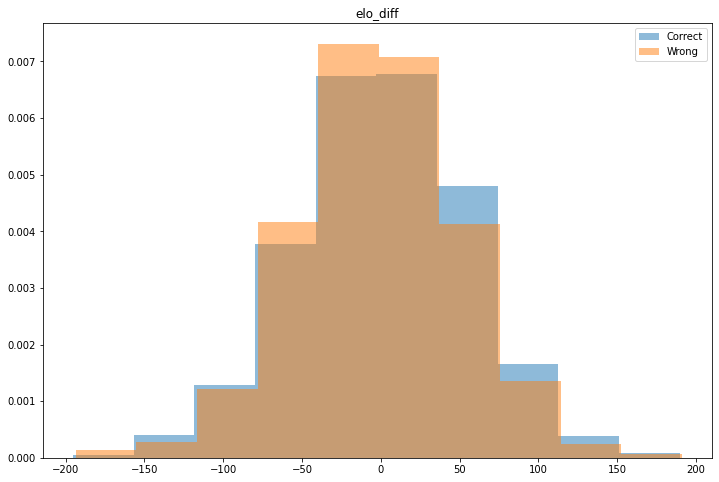

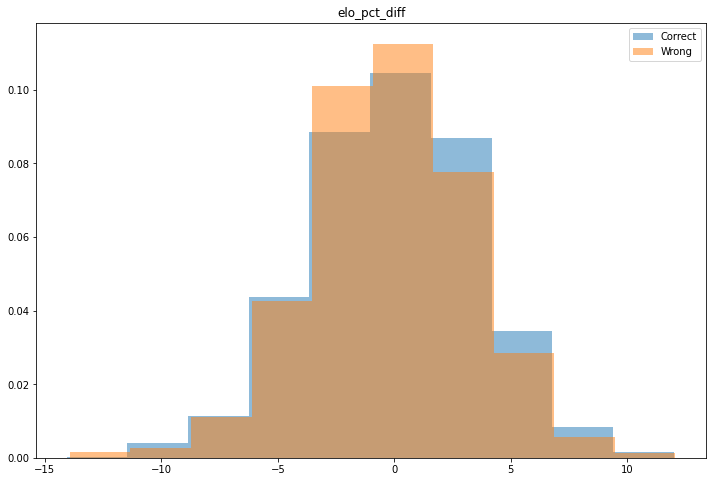

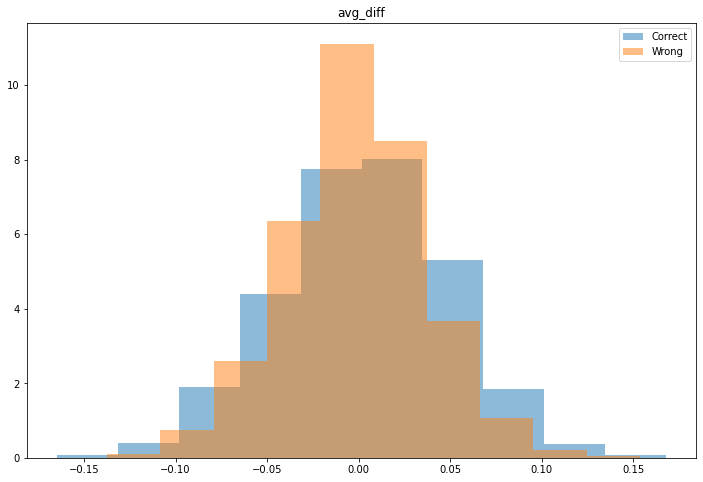

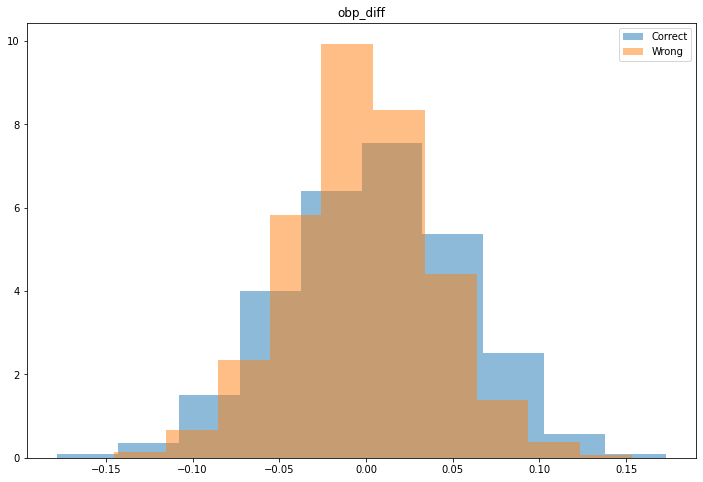

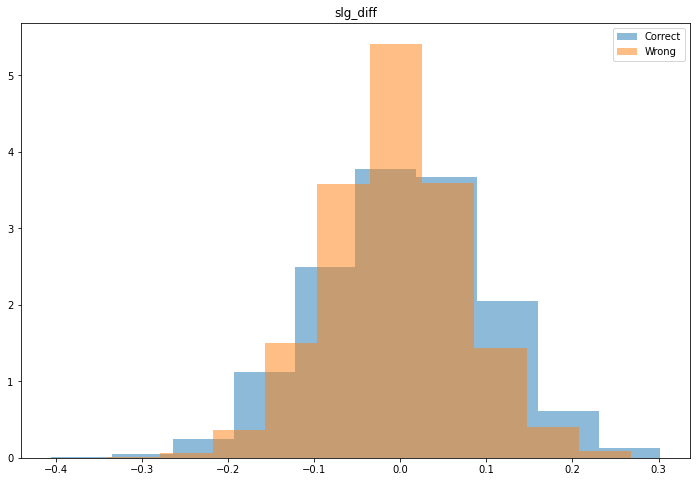

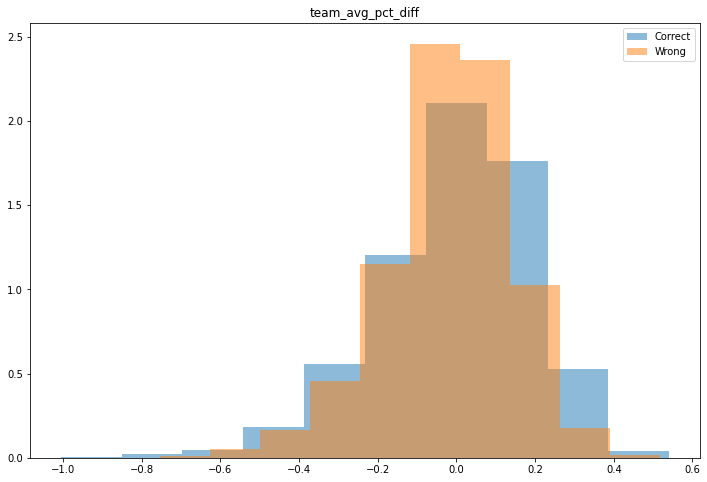

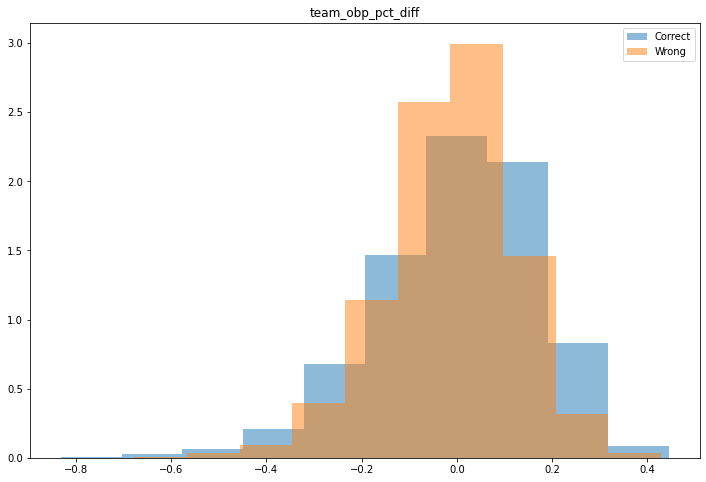

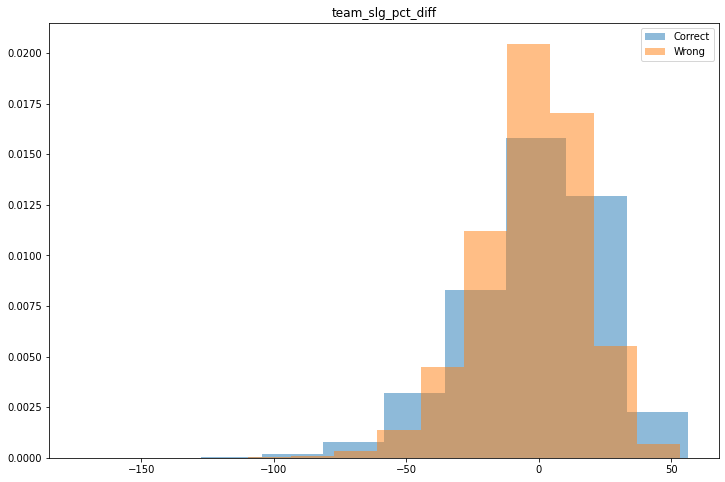

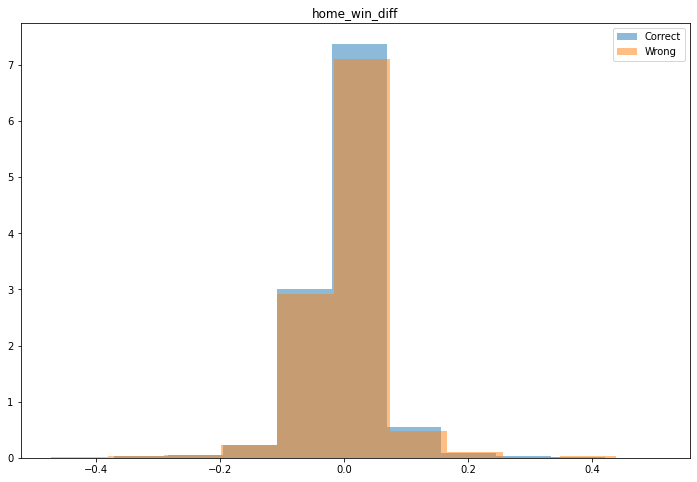

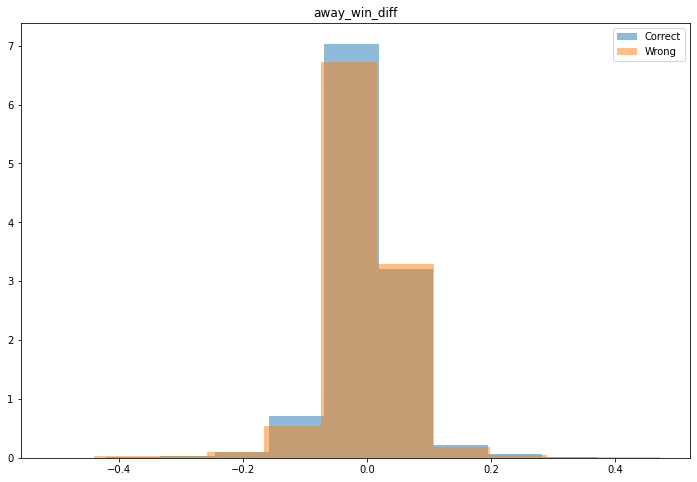

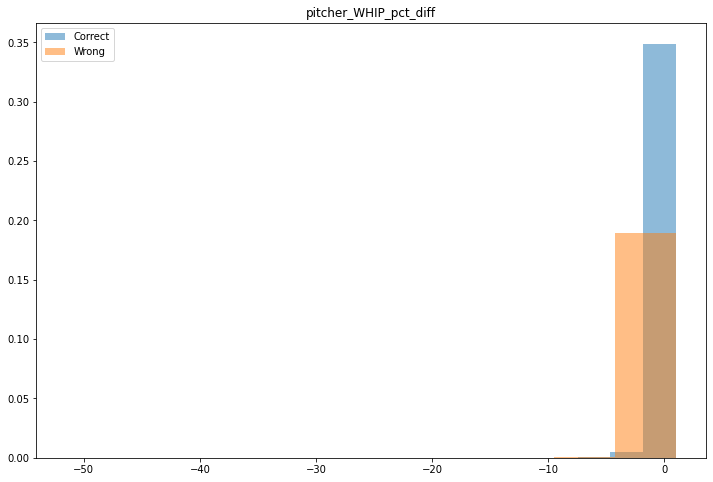

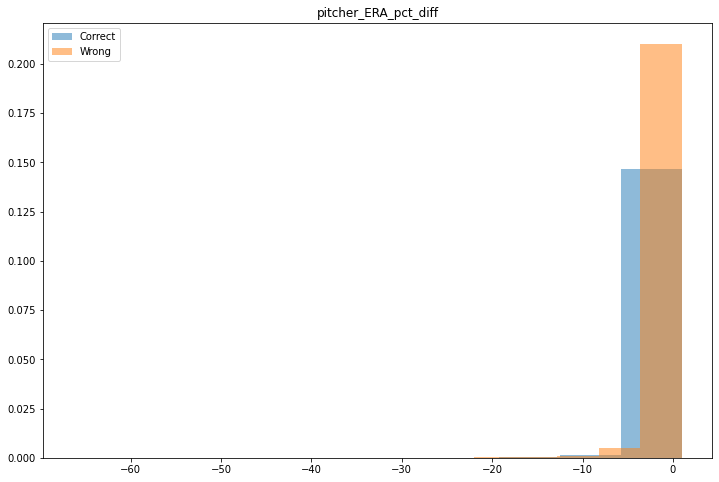

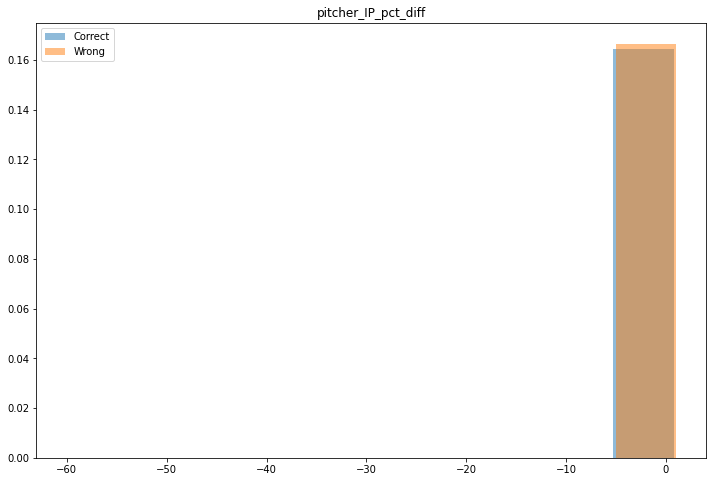

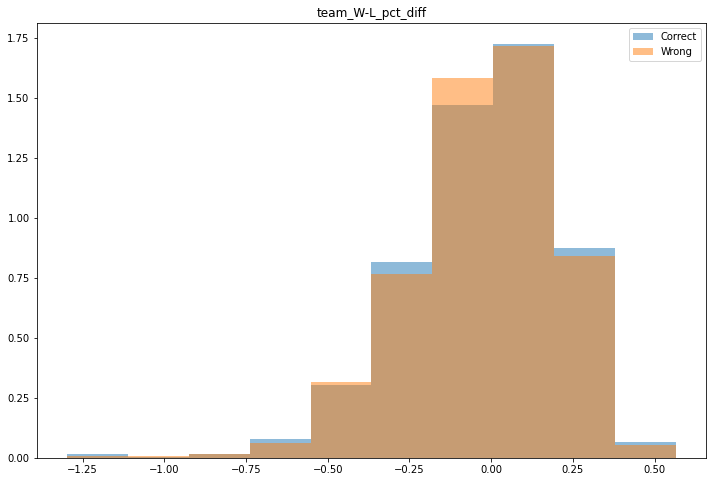

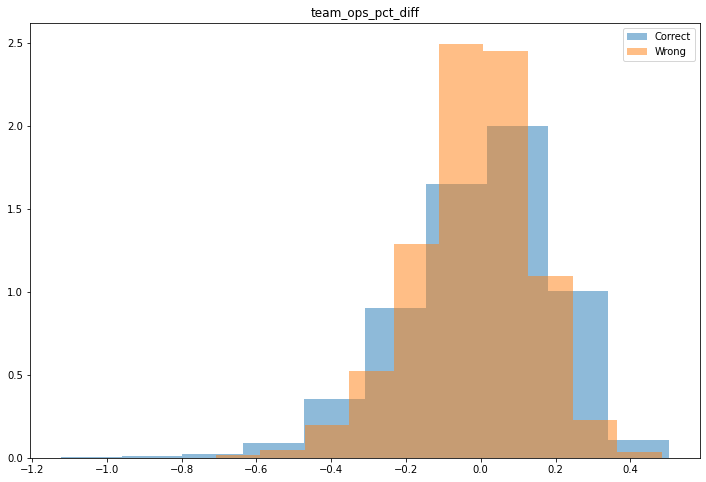

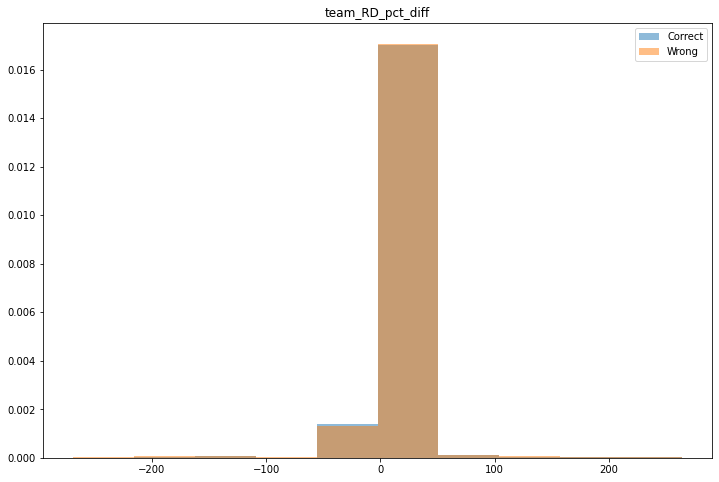

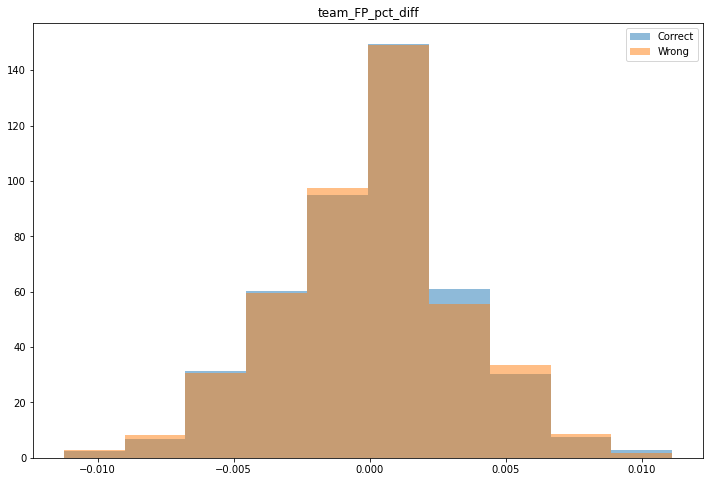

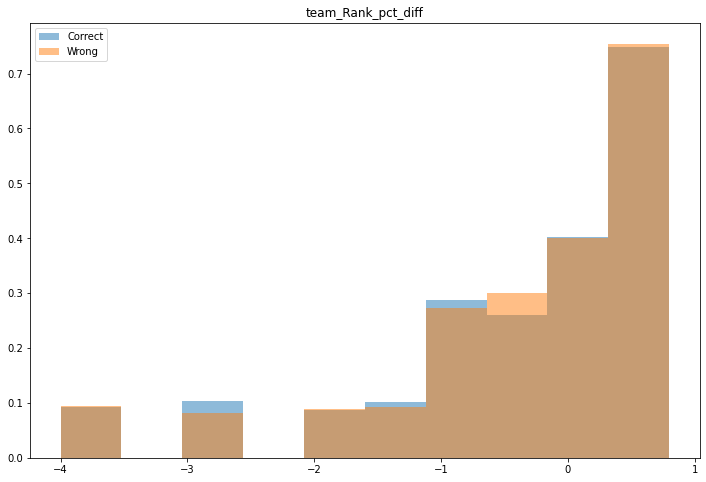

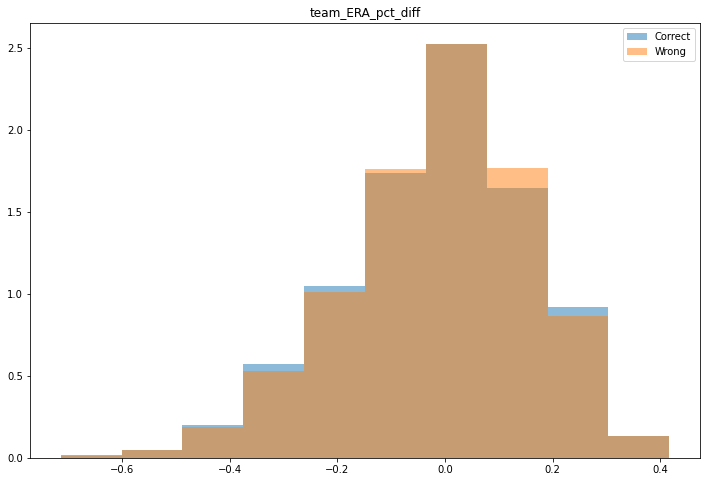

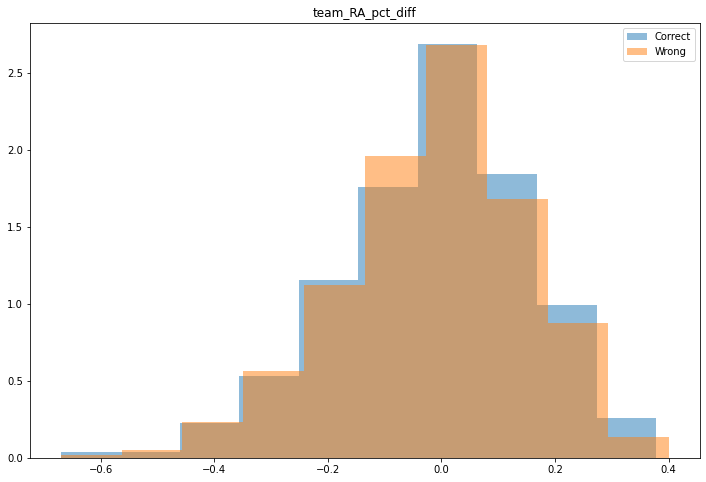

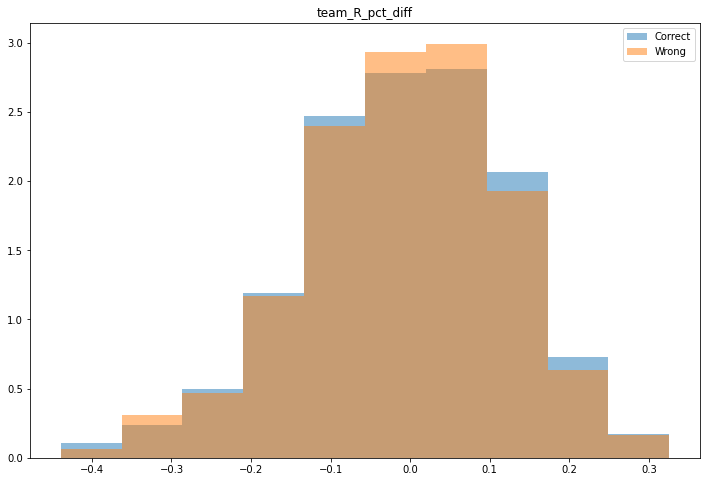

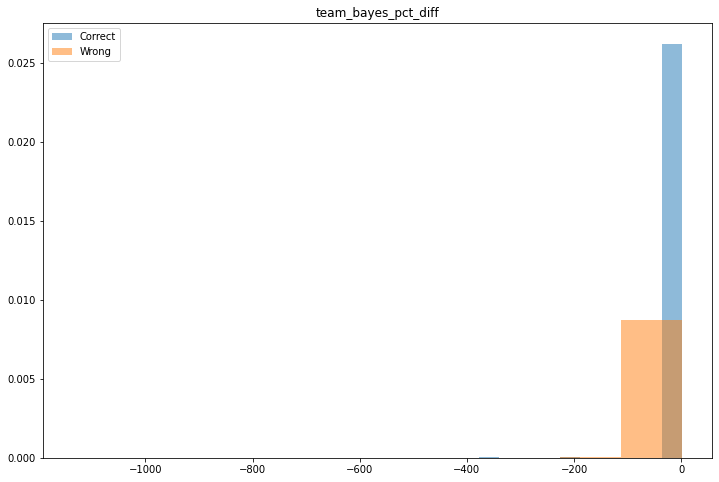

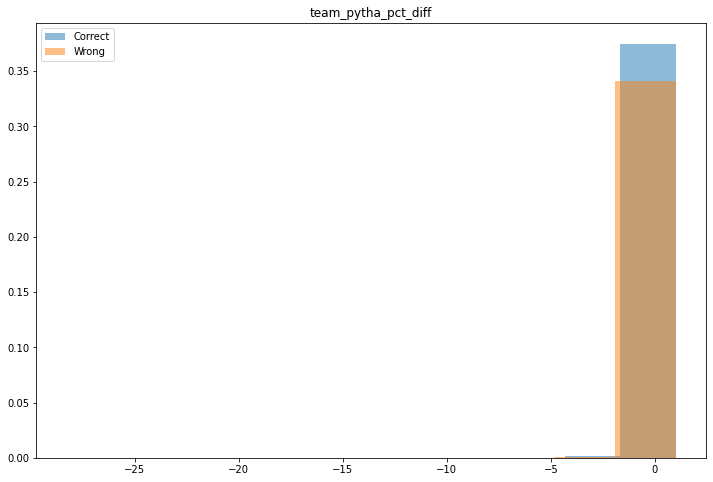

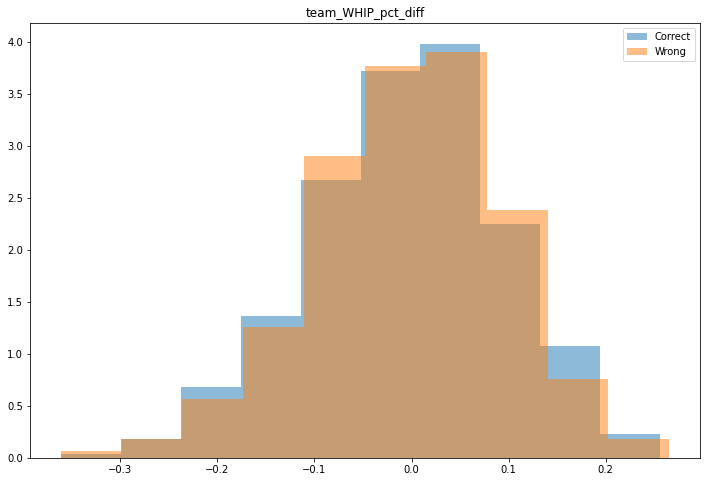

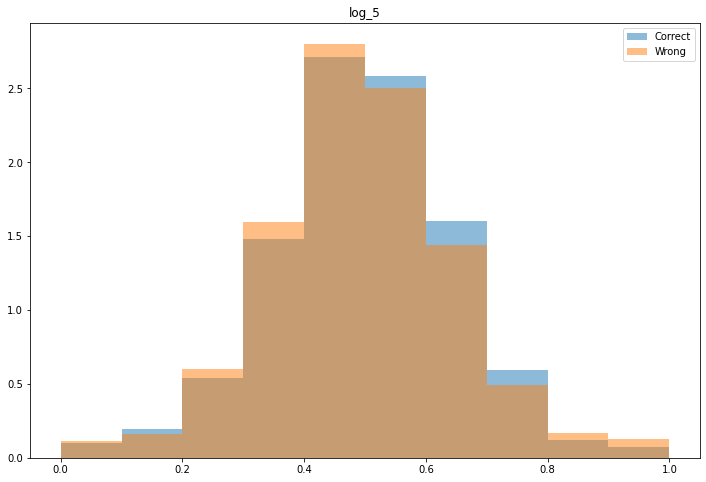

In [12]:
plot_density_by_model(xgb_correct, xgb_wrong)

In [305]:
def plot_density_across_models(col):
    models_correct = [xgb_correct, knn_correct, knn_no_batting_correct, nn_correct]
    models_wrong = [xgb_wrong, knn_wrong, knn_no_batting_wrong, nn_wrong]
    models_labels = ['XGB', 'KNN', 'KNN (no hitting)', 'NN']
        
    plt.figure(figsize=(12, 8))
    for i, m_c in enumerate(models_correct):
        plt.hist(m_c[col], label=models_labels[i], alpha=0.5, density=True)
    plt.legend()
    plt.title(f'{col} correct')
    plt.show()
    
    plt.figure(figsize=(12, 8))
    for i, m_c in enumerate(models_wrong):
        plt.hist(m_c[col], label=models_labels[i], alpha=0.5, density=True)
    plt.legend()
    plt.title(f'{col} wrong')
    plt.show();

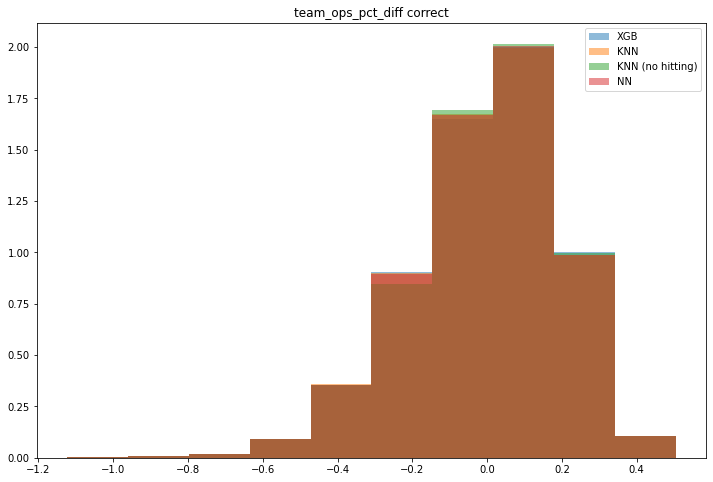

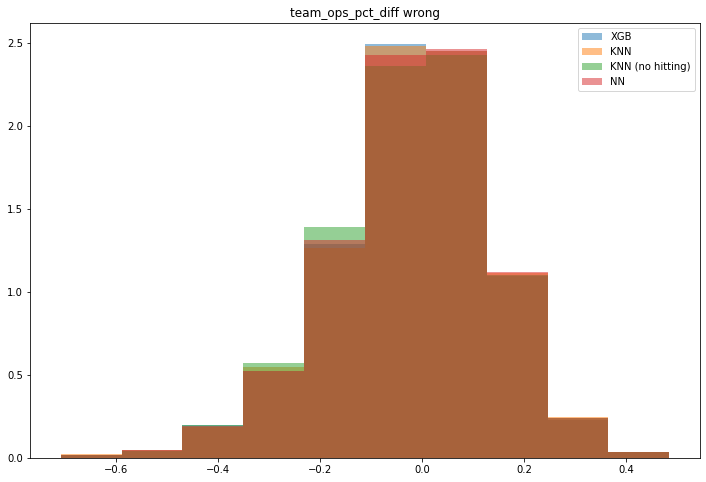

In [306]:
plot_density_across_models('team_ops_pct_diff')

## Accuracy by team

In [307]:
df['xgb_correct'] = (df['home_win'] == df['xgb_pred']).astype(bool)
df['knn_correct'] = (df['home_win'] == df['knn_pred']).astype(bool)
df['knn_no_batting_correct'] = (df['home_win'] == df['knn_no_batting_pred']).astype(bool)
df['nn_correct'] = (df['home_win'] == df['nn_pred']).astype(bool)

In [308]:
df.head()

,team_ops_pct_diff,obp_diff,team_obp_pct_diff,home_Rank_offset1year,away_WHIP_offset1year,team_ERA_pct_diff,home_win_diff_bayes,home_RD,team_bayes_pct_diff,away_win_diff_bayes,...,knn_no_batting_proba,nn_proba,xgb_correct,knn_correct,knn_no_batting_correct,nn_correct,xgb_proba_majority,knn_proba_majority,knn_no_batting_proba_majority,nn_proba_majority
0,0.001479,0.001196,0.003769,2.0,1.253927,0.089783,-0.010464,101.0,0.0,-0.010464,...,0.520000,0.455505,False,False,True,False,0.094638,0.000000,0.040000,0.088991
1,-0.100639,-0.023374,-0.075552,4.0,1.214434,-0.018717,-0.010464,2.0,0.0,-0.010464,...,0.506667,0.395637,True,True,False,True,0.245543,0.053333,0.013333,0.208727
2,0.028053,0.009820,0.030927,1.0,1.179045,0.077540,-0.010464,83.0,0.0,-0.010464,...,0.546667,0.508145,True,True,True,True,0.259434,0.066667,0.093333,0.016291
3,0.031095,0.006132,0.019876,5.0,1.320066,0.043269,-0.010464,-35.0,0.0,-0.010464,...,0.506667,0.525333,False,True,False,False,0.145007,0.026667,0.013333,0.050666
4,-0.026164,-0.014945,-0.049505,3.0,1.151872,0.147208,-0.010464,-14.0,0.0,-0.010464,...,0.486667,0.497620,False,True,True,True,0.031748,0.026667,0.026667,0.004760


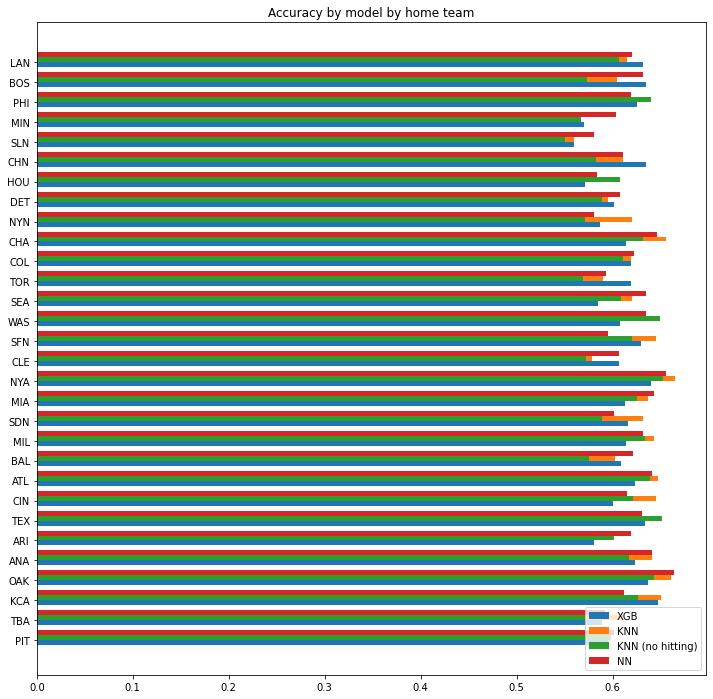

In [309]:
N = df['home_team'].nunique()
ind = np.arange(N)
width = 0.25

plt.figure(figsize=(12, 12))
plt.barh(ind, df.groupby('home_team')['xgb_correct'].mean().values, width, label='XGB')
plt.barh(ind + width, df.groupby('home_team')['knn_correct'].mean().values, width, label='KNN')
plt.barh(ind + width, df.groupby('home_team')['knn_no_batting_correct'].mean().values, width, label='KNN (no hitting)')
plt.barh(ind + 2*width, df.groupby('home_team')['nn_correct'].mean().values, width, label='NN')

plt.yticks(ind + width / 2, df['home_team'].unique())
plt.legend()
plt.title('Accuracy by model by home team');

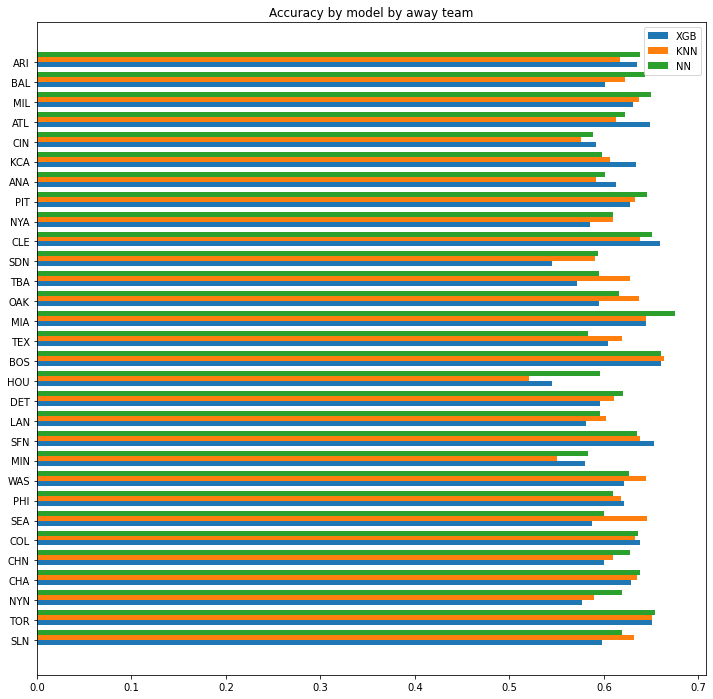

In [18]:
N = df['away_team'].nunique()
ind = np.arange(N)
width = 0.25

plt.figure(figsize=(12, 12))
plt.barh(ind, df.groupby('away_team')['xgb_correct'].mean().values, width, label='XGB')
plt.barh(ind + width, df.groupby('away_team')['knn_correct'].mean().values, width, label='KNN')
plt.barh(ind + 2*width, df.groupby('away_team')['nn_correct'].mean().values, width, label='NN')

plt.yticks(ind + width / 2, df['away_team'].unique())
plt.legend()
plt.title('Accuracy by model by away team');

## Heatmap of model accuracy by year by team

In [19]:
model_acc = df.groupby(['Y', 'home_team'])[['xgb_correct', 'knn_correct', 'nn_correct']].mean()

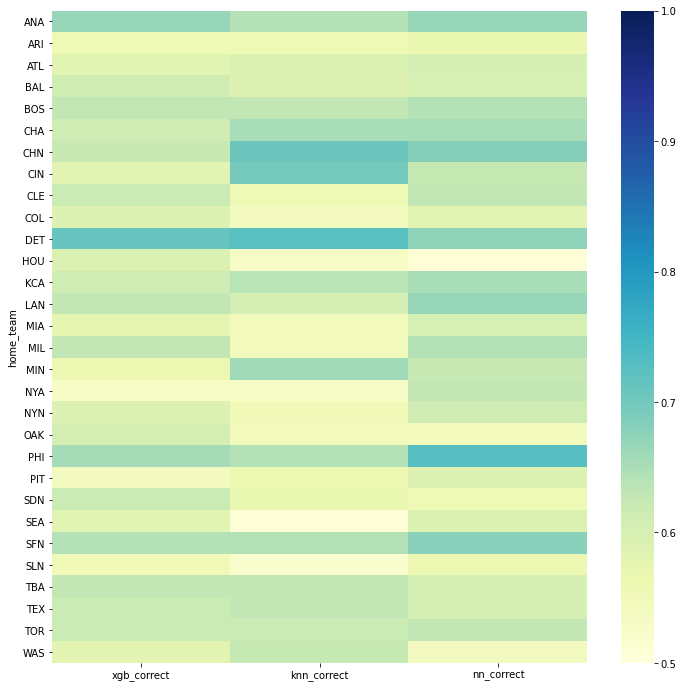

In [20]:
plt.figure(figsize=(12, 12))
sns.heatmap(model_acc.loc[2016], vmin=0.5, vmax=1, cmap="YlGnBu");

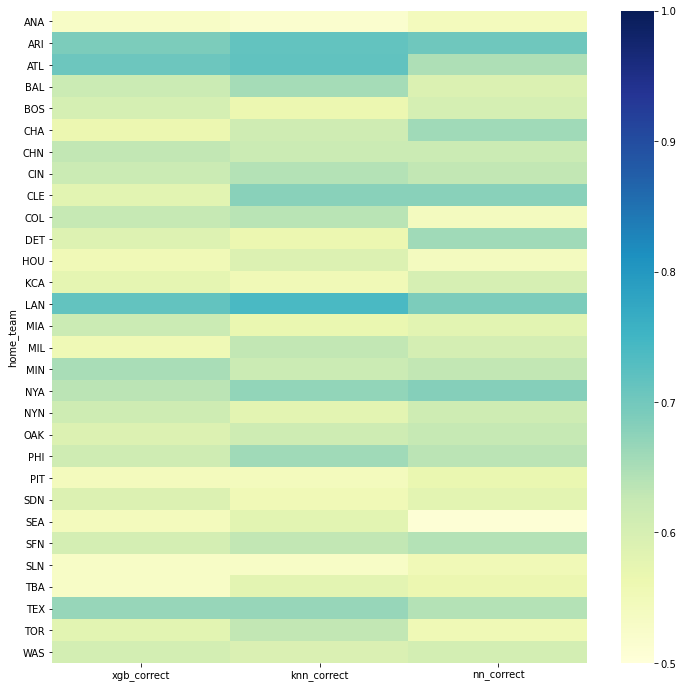

In [21]:
plt.figure(figsize=(12, 12))
sns.heatmap(model_acc.loc[2017], vmin=0.5, vmax=1, cmap="YlGnBu");

## Predicted probabilities

Do the models predicted probabilities serve as a useful proxy for confidence in their prediction?

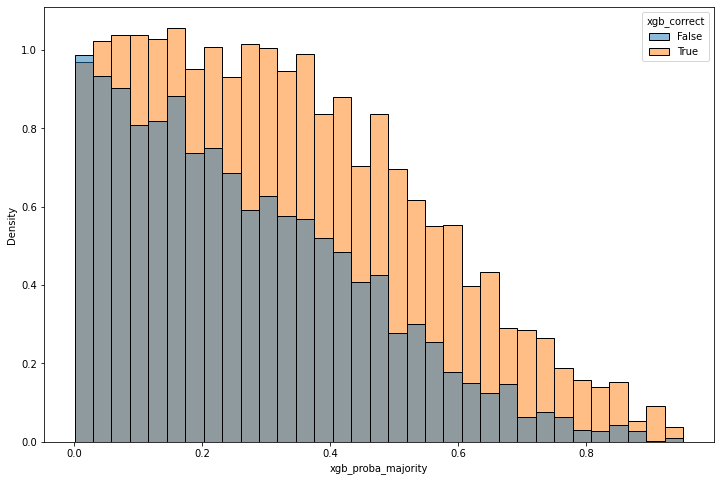

In [310]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='xgb_proba_majority', hue='xgb_correct', stat='density');

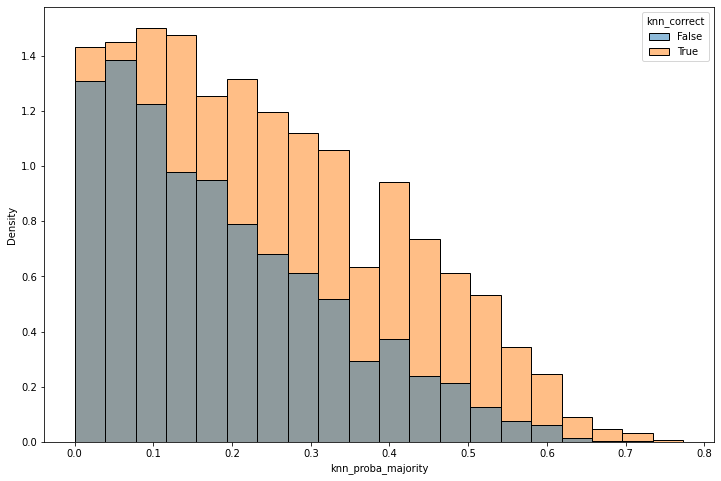

In [311]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='knn_proba_majority', hue='knn_correct', stat='density', bins=20);

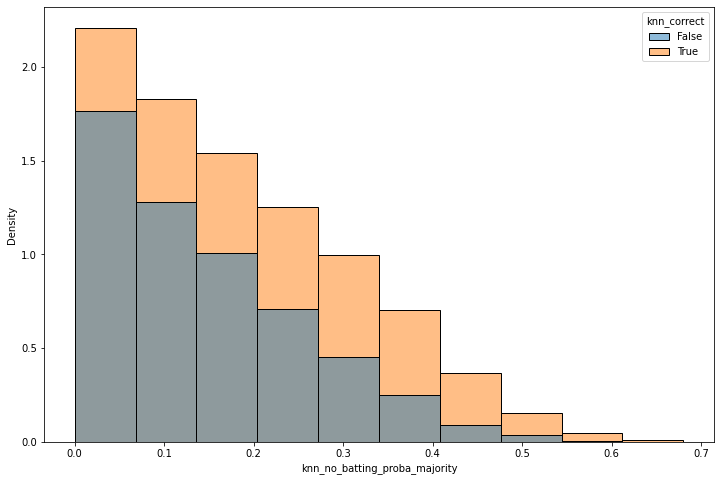

In [315]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='knn_no_batting_proba_majority', hue='knn_correct', stat='density', bins=10);

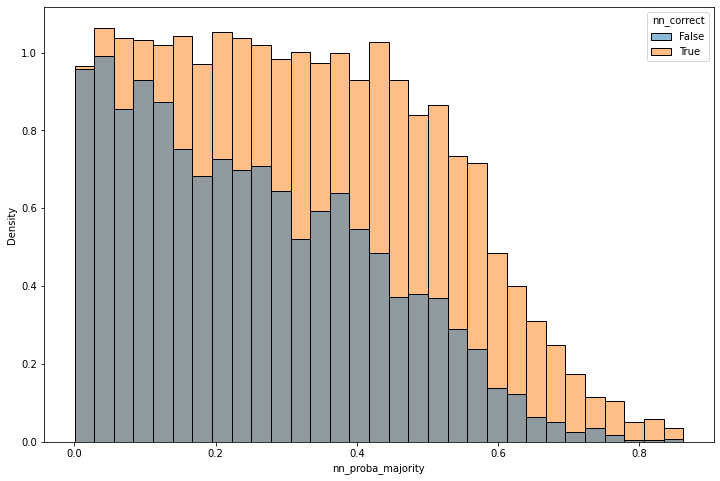

In [313]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='nn_proba_majority', hue='nn_correct', stat='density');

## Agreements and disagreements

Use Morgan's idea of where KNN (no hitting) and the NN disagree and remake the above graphs.

In [318]:
def disagreements(df, model1_pred_col, model2_pred_col):
    conditions = [(df[model1_pred_col] != df[model2_pred_col])]     #Sets the conditions
    df['mixed_preds'] = np.select(conditions, [1], 0)

    disagree_df = df[df['mixed_preds'] == 1]
    print(f'{100*disagree_df.shape[0]/df.shape[0]:.2f}% disagreed on')
    return disagree_df

In [319]:
disagree_knn_nn = disagreements(df, 'knn_no_batting_pred', 'nn_pred')

19.24% disagreed on


In [320]:
disagree_knn_xgb = disagreements(df, 'knn_no_batting_pred', 'xgb_pred')

23.18% disagreed on


In [321]:
disagree_nn_xgb = disagreements(df, 'xgb_pred', 'nn_pred')

19.42% disagreed on


## Strength of predictions

Compare the strength of predictions (predicted probability) for models where they disagree.

### KNN vs NN

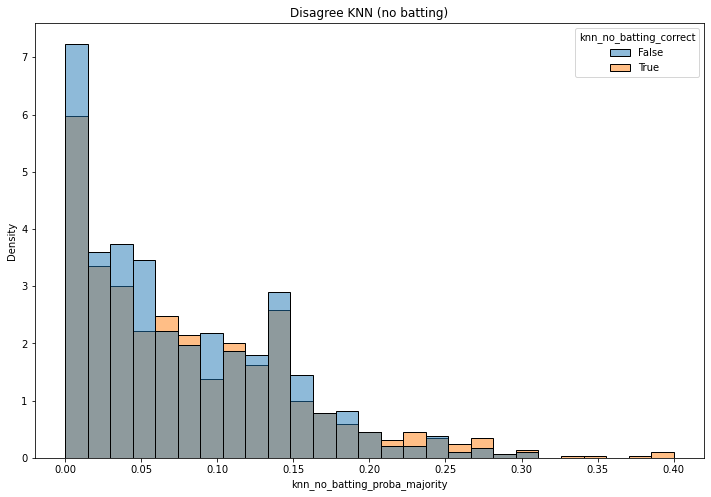

In [328]:
plt.figure(figsize=(12, 8))
sns.histplot(data=disagree_knn_nn, x='knn_no_batting_proba_majority', hue='knn_no_batting_correct', stat='density')
plt.title('Disagree KNN (no batting)');

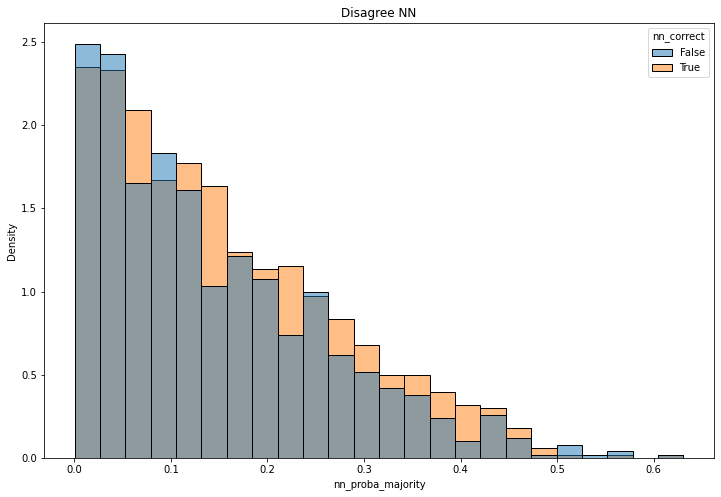

In [331]:
plt.figure(figsize=(12, 8))
sns.histplot(data=disagree_knn_nn, x='nn_proba_majority', hue='nn_correct', stat='density')
plt.title('Disagree NN');

### KNN vs XGB

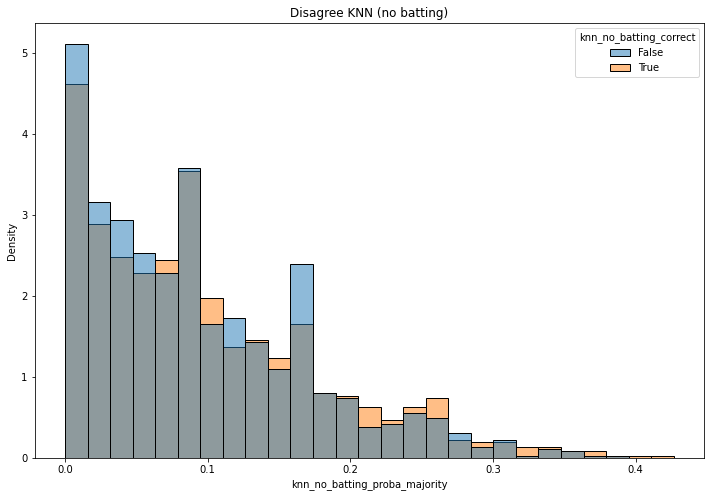

In [332]:
plt.figure(figsize=(12, 8))
sns.histplot(data=disagree_knn_xgb, x='knn_no_batting_proba_majority', hue='knn_no_batting_correct', stat='density')
plt.title('Disagree KNN (no batting)');

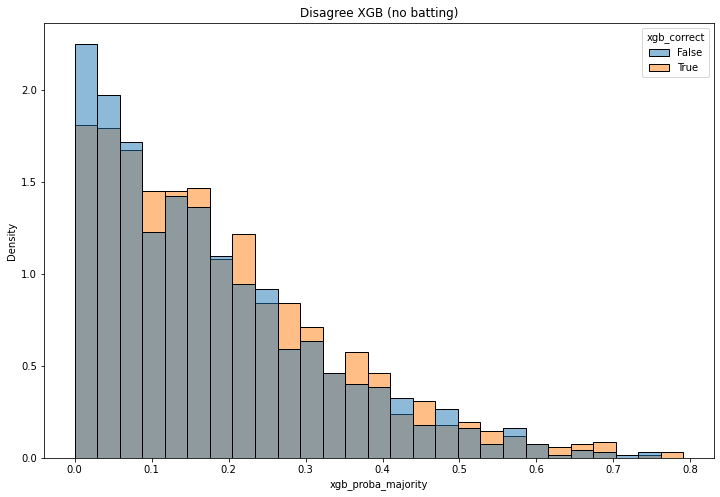

In [333]:
plt.figure(figsize=(12, 8))
sns.histplot(data=disagree_knn_xgb, x='xgb_proba_majority', hue='xgb_correct', stat='density')
plt.title('Disagree XGB (no batting)');

### NN vs XGB

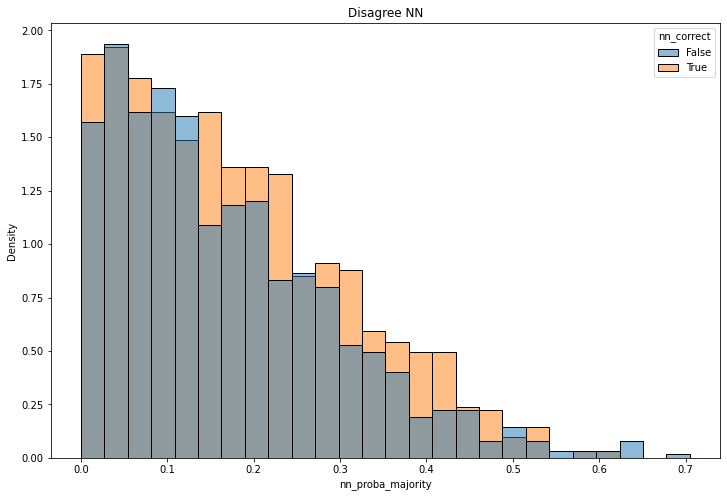

In [334]:
plt.figure(figsize=(12, 8))
sns.histplot(data=disagree_knn_xgb, x='nn_proba_majority', hue='nn_correct', stat='density')
plt.title('Disagree NN');

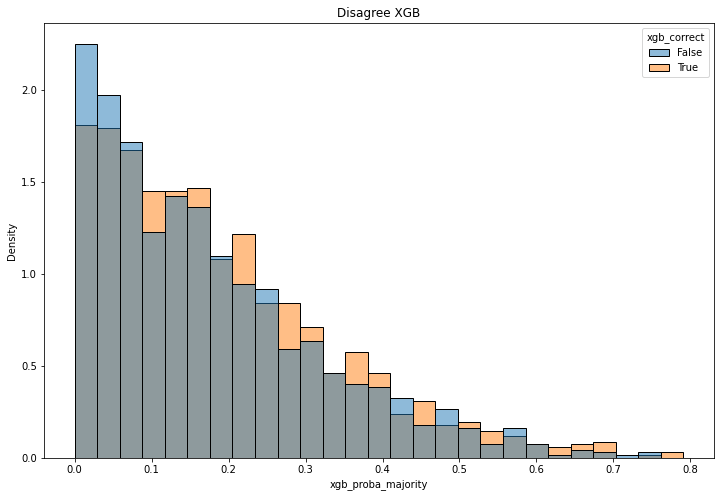

In [335]:
plt.figure(figsize=(12, 8))
sns.histplot(data=disagree_knn_xgb, x='xgb_proba_majority', hue='xgb_correct', stat='density')
plt.title('Disagree XGB');

A quick attempt at splitting out the main hitting and pitching columns. If this approach shows promise, ask Morgan to do this more carefully.

In [30]:
hitting_cols = ['team_avg_pct_diff', 'team_obp_pct_diff', 'team_slg_pct_diff', 'team_ops_pct_diff']
pitching_cols = [c for c in disagree_df.columns if '_pitcher_' in c]
pitching_cols += [c for c in disagree_df.columns if '_WHIP_' in c]
pitching_cols += [c for c in disagree_df.columns if '_ERA_' in c]
pitching_cols = [c for c in pitching_cols if c.endswith('_pct_diff')]
pitching_cols = list(set(pitching_cols))

In [31]:
hitting_cols

['team_avg_pct_diff',
 'team_obp_pct_diff',
 'team_slg_pct_diff',
 'team_ops_pct_diff']

In [32]:
pitching_cols

['pitcher_WHIP_pct_diff',
 'pitcher_ERA_pct_diff',
 'team_WHIP_pct_diff',
 'team_ERA_pct_diff']

When the two models disagree, how many of the hitting columns are positive (when the home team wins, or negative when the away team wins)? What about the same for pitching columns? Compare the percentages over all games (regardless of if the models agreed or not) versus just games where the models disagreed.

In [33]:
all_games_hitting = (df[(df['home_win'] == 1)][hitting_cols] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
all_games_hitting.name = 'all_games_hitting'

In [34]:
disagree_games_hitting = (disagree_df[(disagree_df['home_win'] == 1)][hitting_cols] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
disagree_games_hitting.name = 'disagree_games_hitting'

In [35]:
disagree_games_hitting_knn_correct = (disagree_df[(disagree_df['home_win'] == 1) & (disagree_df['knn_no_batting_correct'] == True)][hitting_cols] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
disagree_games_hitting_knn_correct.name = 'disagree_games_hitting_knn_correct'

In [36]:
disagree_games_hitting_nn_correct = (disagree_df[(disagree_df['home_win'] == 1) & (disagree_df['nn_correct'] == True)][hitting_cols] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
disagree_games_hitting_nn_correct.name = 'disagree_games_hitting_nn_correct'

In [37]:
stats_df = pd.merge(all_games_hitting, disagree_games_hitting, left_index=True, right_index=True)
stats_df = pd.merge(stats_df, disagree_games_hitting_knn_correct, left_index=True, right_index=True)
stats_df = pd.merge(stats_df, disagree_games_hitting_nn_correct, left_index=True, right_index=True)

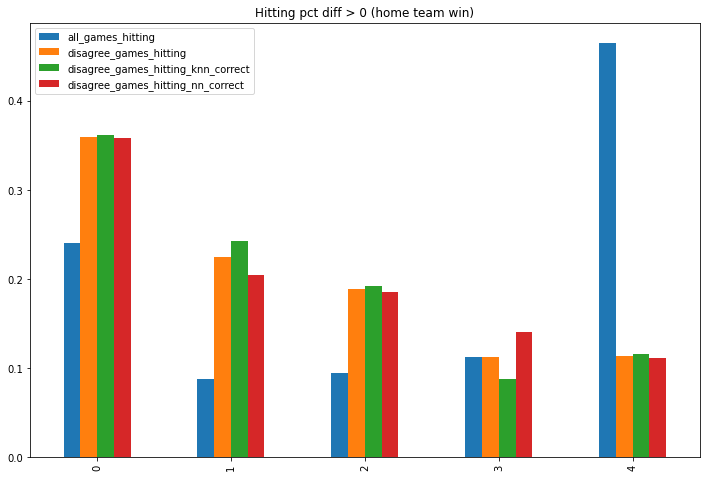

In [38]:
stats_df.plot(kind='bar', figsize=(12, 8), title='Hitting pct diff > 0 (home team win)');

Repeat it for the pitching columns.

In [39]:
all_games_pitching = (df[(df['home_win'] == 1)][pitching_cols] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
all_games_pitching.name = 'all_games_pitching'

In [40]:
disagree_games_pitching = (disagree_df[(disagree_df['home_win'] == 1)][pitching_cols] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
disagree_games_pitching.name = 'disagree_games_pitching'

In [41]:
disagree_games_pitching_knn_correct = (disagree_df[(disagree_df['home_win'] == 0) & (disagree_df['knn_no_batting_correct'] == True)][pitching_cols] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
disagree_games_pitching_knn_correct.name = 'disagree_games_pitching_knn_correct'

In [42]:
disagree_games_pitching_nn_correct = (disagree_df[(disagree_df['home_win'] == 0) & (disagree_df['nn_correct'] == True)][pitching_cols] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
disagree_games_pitching_nn_correct.name = 'disagree_games_pitching_nn_correct'

In [43]:
stats_df = pd.merge(all_games_pitching, disagree_games_pitching, left_index=True, right_index=True)
stats_df = pd.merge(stats_df, disagree_games_pitching_knn_correct, left_index=True, right_index=True)
stats_df = pd.merge(stats_df, disagree_games_pitching_nn_correct, left_index=True, right_index=True)

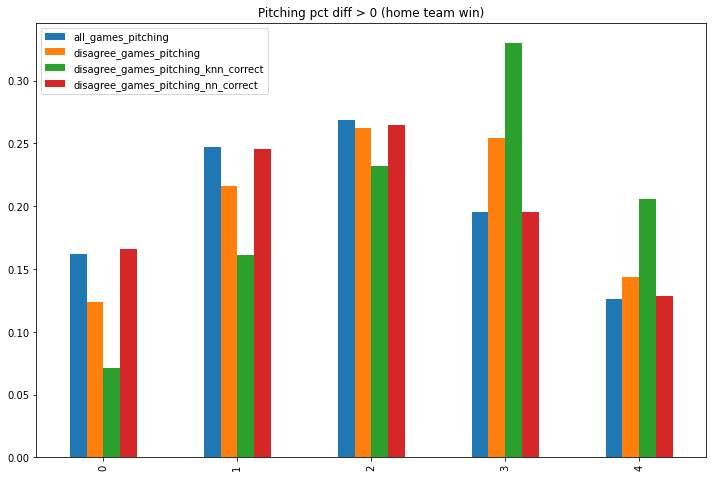

In [44]:
stats_df.plot(kind='bar', figsize=(12, 8), title='Pitching pct diff > 0 (home team win)');

In [336]:
def compare_col_signs(col, positive_favors_home=True):
    if not isinstance(col, list):
        col = [col]
    if positive_favors_home:
        all_games = (df[(df['home_win'] == 1)][col] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
        all_games.name = 'all_games'
        disagree_games = (disagree_df[(disagree_df['home_win'] == 1)][col] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
        disagree_games.name = 'disagree_games'
        disagree_games_knn = (disagree_df[(disagree_df['home_win'] == 1) & (disagree_df['knn_no_batting_correct'])][col] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
        disagree_games_knn.name = 'disagree_games_knn_correct'
        disagree_games_nn = (disagree_df[(disagree_df['home_win'] == 1) & (disagree_df['nn_correct'])][col] > 0).sum(axis='columns').value_counts(normalize=True).sort_index()
        disagree_games_nn.name = 'disagree_games_nn_correct'
        stats_df = pd.merge(all_games, disagree_games, left_index=True, right_index=True)
        stats_df = pd.merge(stats_df, disagree_games_knn, left_index=True, right_index=True)
        stats_df = pd.merge(stats_df, disagree_games_nn, left_index=True, right_index=True)
        
        amount = 0
        for i in range(stats_df.shape[0]):
            nn_val = stats_df.iloc[i]['disagree_games_nn_correct']
            knn_val = stats_df.iloc[i]['disagree_games_knn_correct']
            if nn_val > knn_val:
                amount = amount + (nn_val-knn_val)
            else:
                amount = amount + (knn_val-nn_val)
        print(f'The value is {amount}')
        
        stats_df.plot(kind='bar', figsize=(12, 8))
    else:
        all_games = (df[(df['home_win'] == 1)][col] < 0).sum(axis='columns').value_counts(normalize=True).sort_index()
        all_games.name = 'all_games'
        disagree_games = (disagree_df[(disagree_df['home_win'] == 1)][col] < 0).sum(axis='columns').value_counts(normalize=True).sort_index()
        disagree_games.name = 'disagree_games'
        disagree_games_knn = (disagree_df[(disagree_df['home_win'] == 1) & (disagree_df['knn_no_batting_correct'])][col] < 0).sum(axis='columns').value_counts(normalize=True).sort_index()
        disagree_games_knn.name = 'disagree_games_knn_correct'
        disagree_games_nn = (disagree_df[(disagree_df['home_win'] == 1) & (disagree_df['nn_correct'])][col] < 0).sum(axis='columns').value_counts(normalize=True).sort_index()
        disagree_games_nn.name = 'disagree_games_nn_correct'
        stats_df = pd.merge(all_games, disagree_games, left_index=True, right_index=True)
        stats_df = pd.merge(stats_df, disagree_games_knn, left_index=True, right_index=True)
        stats_df = pd.merge(stats_df, disagree_games_nn, left_index=True, right_index=True)
                
        stats_df.plot(kind='bar', figsize=(12, 8))
        amount=0
    return amount

In [46]:
pct_diff_cols = [c for c in disagree_df.columns if c.endswith('_pct_diff')]
pct_diff_reverse_cols = ['pitcher_WHIP_pct_diff', 'team_Rank_pct_diff', 
                         'team_WHIP_pct_diff', 'team_ERA_pct_diff', 'pitcher_ERA_pct_diff',
                         'team_RA_pct_diff']
for c in pct_diff_reverse_cols:
    pct_diff_cols.remove(c)

In [47]:
pct_diff_cols

['elo_pct_diff',
 'team_avg_pct_diff',
 'team_obp_pct_diff',
 'team_slg_pct_diff',
 'pitcher_IP_pct_diff',
 'team_W-L_pct_diff',
 'team_ops_pct_diff',
 'team_RD_pct_diff',
 'team_FP_pct_diff',
 'team_R_pct_diff',
 'team_bayes_pct_diff',
 'team_pytha_pct_diff']

In [48]:
pct_diff_reverse_cols

['pitcher_WHIP_pct_diff',
 'team_Rank_pct_diff',
 'team_WHIP_pct_diff',
 'team_ERA_pct_diff',
 'pitcher_ERA_pct_diff',
 'team_RA_pct_diff']

In [49]:
hitting_cols = ['team_avg_pct_diff', 'team_obp_pct_diff', 
                'team_slg_pct_diff', 'team_ops_pct_diff']

The value is 0.023184988702230125


0.023184988702230125

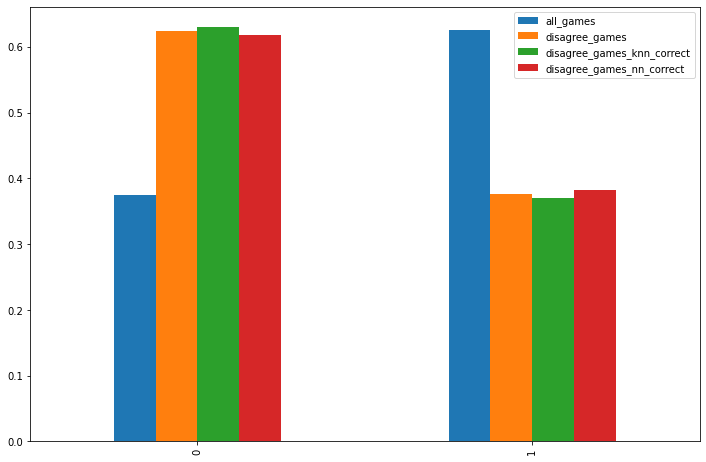

In [106]:
compare_col_signs('team_obp_pct_diff')

The value is 0.1052411828273897


0.1052411828273897

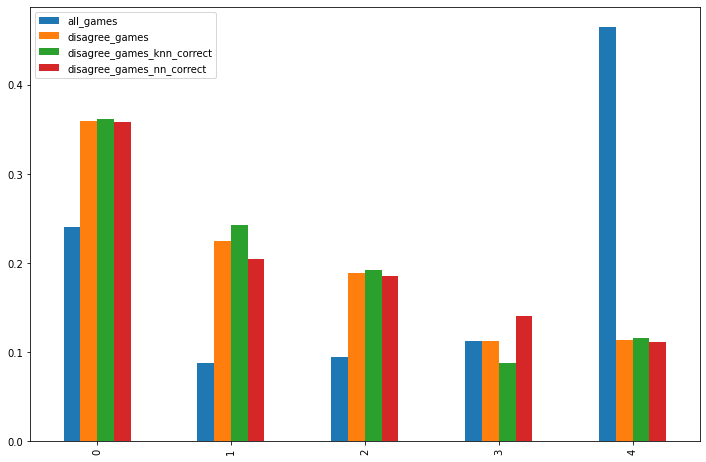

In [107]:
compare_col_signs(hitting_cols)

The value is 0.622255378720896


0.622255378720896

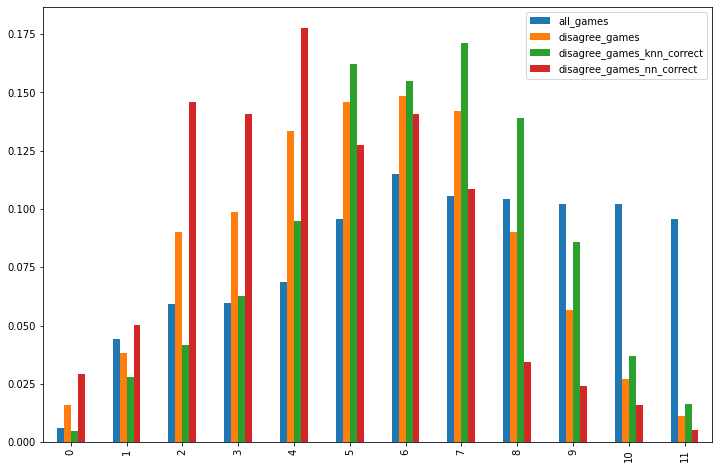

In [108]:
compare_col_signs(pct_diff_cols)

0

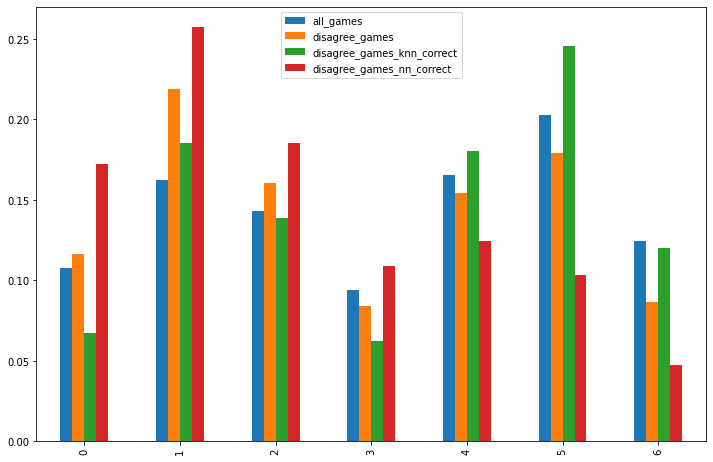

In [111]:
compare_col_signs(pct_diff_reverse_cols, positive_favors_home=False)

In [112]:
columns = ['pitcher_IP_pct_diff',
 'team_W-L_pct_diff',
 'team_RD_pct_diff',
 'team_FP_pct_diff',
 'team_R_pct_diff',
 'team_bayes_pct_diff',
 'team_pytha_pct_diff']

The value is 0.7188206110619904


0.7188206110619904

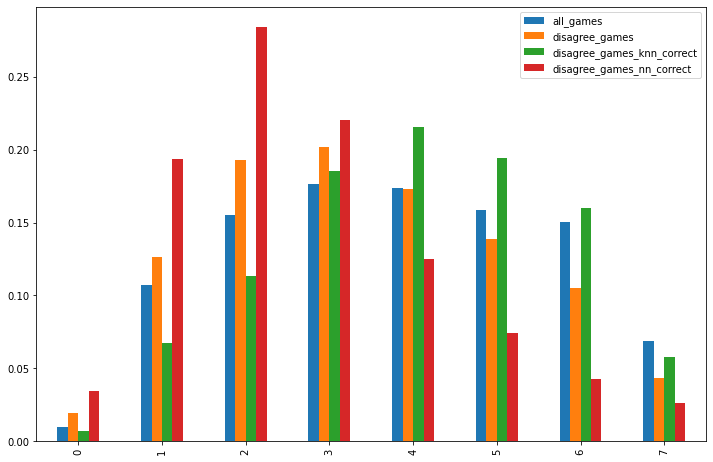

In [113]:
compare_col_signs(columns)

In [114]:
columns = ['pitcher_IP_pct_diff',
 'team_W-L_pct_diff',
 'team_RD_pct_diff',
 'team_FP_pct_diff',
 'team_bayes_pct_diff',
 'team_pytha_pct_diff']

The value is 0.6929585420964732


0.6929585420964732

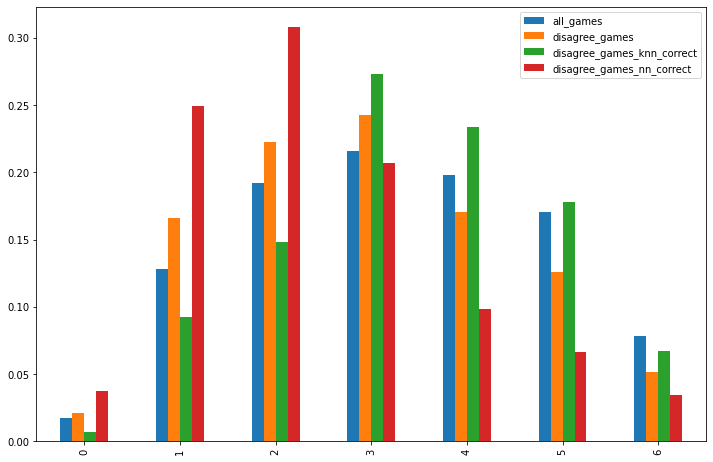

In [115]:
compare_col_signs(columns)

In [84]:
cols = ['team_avg_pct_diff',
 'team_obp_pct_diff',
 'team_slg_pct_diff',
 'pitcher_IP_pct_diff',
 'team_W-L_pct_diff',
 'team_ops_pct_diff',
 'team_RD_pct_diff',
 'team_FP_pct_diff',
 'team_R_pct_diff',
 'team_bayes_pct_diff',
 'team_pytha_pct_diff']

In [83]:
def powerset(s):
    x = len(s)
    ps = []
    for i in range(1 << x):
        ps.append([s[j] for j in range(x) if (i & (1 << j))])
  
    return ps[1:]

In [118]:
best_cols = None
best_val = 0
for columns_list in powerset(cols):
    val = compare_col_signs(columns_list)
    
    if val > best_val:
        best_val = val
        best_cols = columns_list

In [119]:
best_val

0.8304106493761666

In [120]:
best_cols

['team_slg_pct_diff',
 'team_W-L_pct_diff',
 'team_FP_pct_diff',
 'team_R_pct_diff',
 'team_bayes_pct_diff',
 'team_pytha_pct_diff']

The value is 0.8304106493761666
1.0


0.8304106493761666

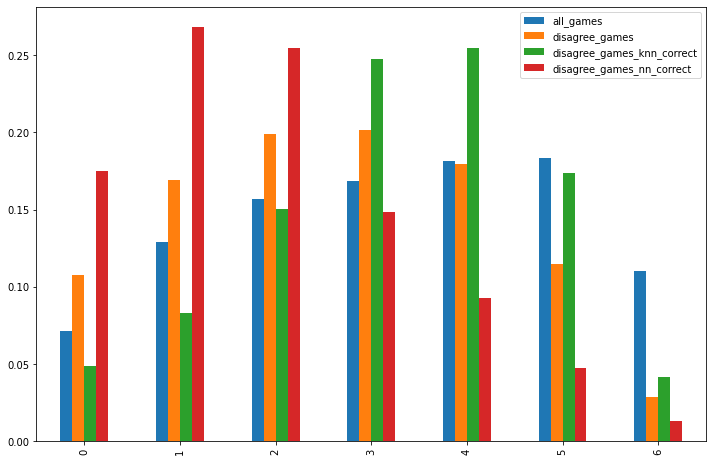

In [125]:
compare_col_signs(best_cols)